In [234]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

# Desafio 1

#### Importando e estudando o dataframe

In [235]:
# criando um dataframe a partir da importação do dataset
clientes_df = pd.read_csv("desafio01consumidor-230829-103627.csv")

In [236]:
# mostrando os cinco primeiros dados do dataframe
clientes_df.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


In [237]:
# verificando o tipo de dados de cada coluna e se há dados faltantes
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    203 non-null    object
 1   idade         203 non-null    int64 
 2   renda         203 non-null    int64 
 3   produto       203 non-null    object
 4   regiao-BR     203 non-null    object
 5   pre-pandemia  203 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.6+ KB


### Item 1

In [238]:
# Separando o dataframe em pré e pós pandemia
pre_pandemia = clientes_df.loc[clientes_df["pre-pandemia"] == 1]
pre_pandemia.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


In [239]:
pos_pandemia = clientes_df.loc[clientes_df["pre-pandemia"] == 0]
pos_pandemia.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
101,XXXXXXX67,35,25959,batom,Sul,0
102,XXXXXXX60,35,1995,desodorante,Nordeste,0
103,XXXXXXX48,53,23314,antissinais,Centro-Oeste,0
104,XXXXXXX67,44,16693,antissinais,Centro-Oeste,0
105,XXXXXXX59,37,14631,base,Nordeste,0


#### Idade

In [240]:
frequencia_absoluta_pre = pre_pandemia.idade.value_counts()
frequencia_absoluta_pre.head()

idade
37    5
26    5
36    4
31    4
38    4
Name: count, dtype: int64

In [241]:
frequencia_relativa_pre = pre_pandemia.idade.value_counts(normalize=True)
frequencia_relativa_pre.head()

idade
37    0.049505
26    0.049505
36    0.039604
31    0.039604
38    0.039604
Name: proportion, dtype: float64

In [242]:
distribuicao_idade_pre = pd.DataFrame(
    data={'Frequência Absoluta' : frequencia_absoluta_pre,
          'Frequência Relativa' : frequencia_relativa_pre}
)
distribuicao_idade_pre.sort_index(inplace=True)
distribuicao_idade_pre.head()

,Frequência Absoluta,Frequência Relativa
idade,,
16,1,0.009901
17,1,0.009901
19,1,0.009901
20,2,0.019802
21,2,0.019802


/tmp/ipykernel_6220/2117096670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(pre_pandemia.idade)


<Axes: title={'center': 'Distribuição da idade no período de pré-pandemia'}, xlabel='Anos', ylabel='Density'>

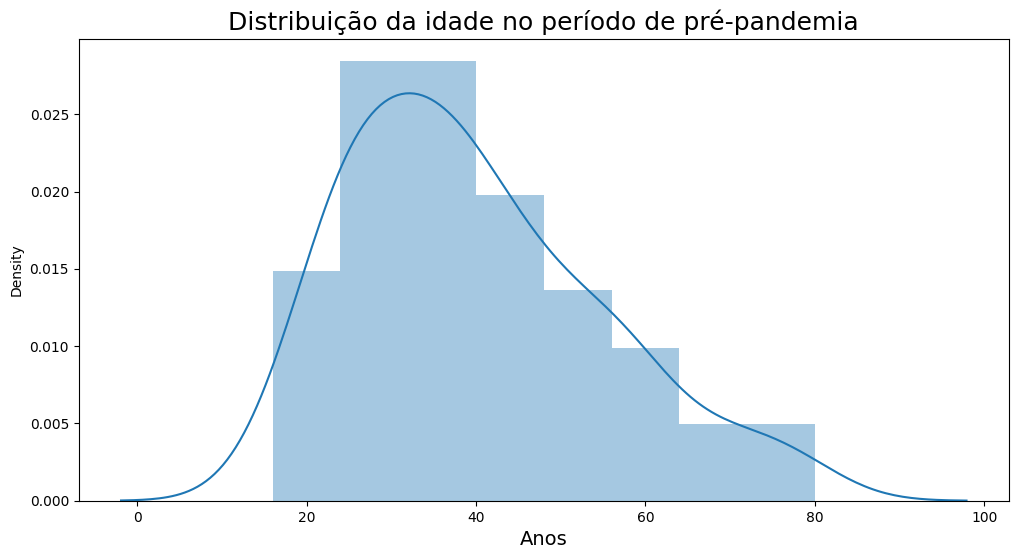

In [243]:
ax = sns.distplot(pre_pandemia.idade)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da idade no período de pré-pandemia', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

In [244]:
frequencia_absoluta_pos = pos_pandemia.idade.value_counts()
frequencia_absoluta_pos.head()

idade
56    7
46    5
35    4
48    4
27    4
Name: count, dtype: int64

In [245]:
frequencia_relativa_pos = pos_pandemia.idade.value_counts(normalize=True)
frequencia_relativa_pos.head()

idade
56    0.068627
46    0.049020
35    0.039216
48    0.039216
27    0.039216
Name: proportion, dtype: float64

In [246]:
distribuicao_idade_pos = pd.DataFrame(
    data={'Frequência Absoluta' : frequencia_absoluta_pos,
          'Frequência Relativa' : frequencia_relativa_pos}
)
distribuicao_idade_pos.sort_index(inplace=True)
distribuicao_idade_pos.head()

,Frequência Absoluta,Frequência Relativa
idade,,
15,1,0.009804
17,2,0.019608
22,1,0.009804
23,1,0.009804
24,2,0.019608


/tmp/ipykernel_6220/2687026523.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(pos_pandemia.idade)


<Axes: title={'center': 'Distribuição da idade no período de pós-pandemia'}, xlabel='Anos', ylabel='Density'>

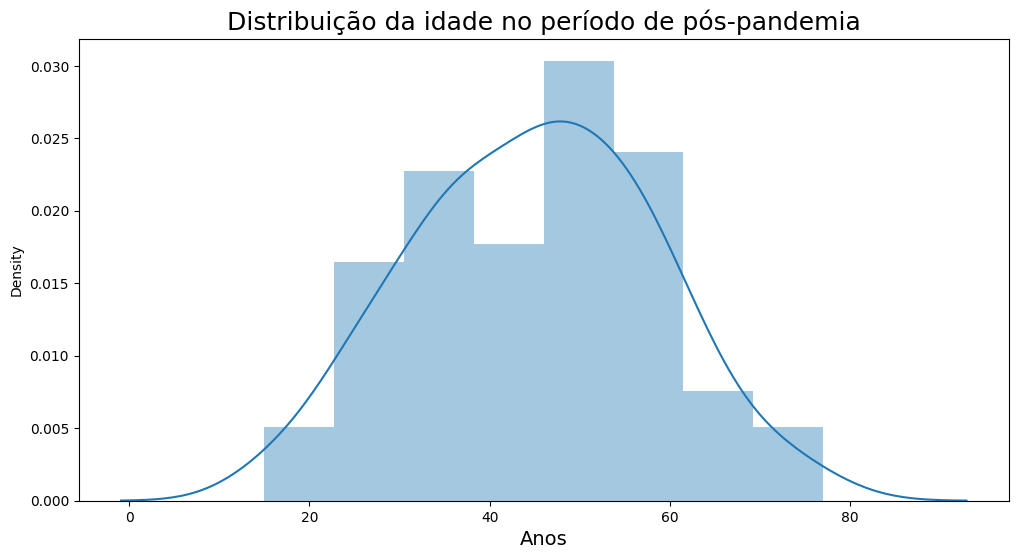

In [247]:
ax = sns.distplot(pos_pandemia.idade)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da idade no período de pós-pandemia', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

In [248]:
idade_info_pandemia = clientes_df.groupby('pre-pandemia')['idade'].agg(['min', 'max', 'mean', 'median'])
idade_info_pandemia.rename(index={0: 'Não', 1: 'Sim'})

,min,max,mean,median
pre-pandemia,,,,
Não,15,77,44.901961,46.0
Sim,16,80,39.881188,37.0


<Axes: title={'center': 'Idade'}, xlabel='Anos', ylabel='pre-pandemia'>

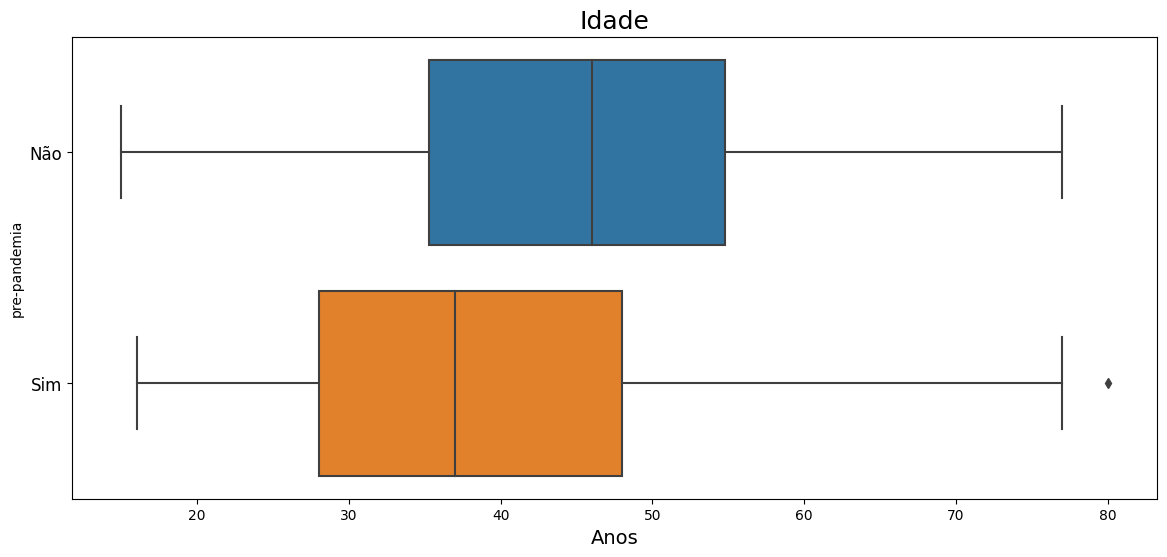

In [249]:
ax = sns.boxplot(x='idade', y='pre-pandemia', data=clientes_df, orient='h')
ax.figure.set_size_inches(14, 6)
ax.set_title("Idade", fontsize=18)
ax.set_xlabel("Anos", fontsize=14)
ax.set_yticklabels(['Não', 'Sim'], fontsize=12)
ax

#### Renda

In [250]:
frequencia_absoluta_pre = pre_pandemia.renda.value_counts()
frequencia_absoluta_pre.head()

renda
7452     1
14108    1
5112     1
6525     1
11375    1
Name: count, dtype: int64

In [251]:
frequencia_relativa_pre = pre_pandemia.renda.value_counts(normalize=True)
frequencia_relativa_pre.head()

renda
7452     0.009901
14108    0.009901
5112     0.009901
6525     0.009901
11375    0.009901
Name: proportion, dtype: float64

In [252]:
distribuicao_renda_pre = pd.DataFrame(
    data={'Frequência Absoluta' : frequencia_absoluta_pre,
          'Frequência Relativa' : frequencia_relativa_pre}
)
distribuicao_renda_pre.sort_index(inplace=True)
distribuicao_renda_pre.head()

,Frequência Absoluta,Frequência Relativa
renda,,
110,1,0.009901
251,1,0.009901
298,1,0.009901
837,1,0.009901
1142,1,0.009901


/tmp/ipykernel_6220/3693543523.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(pre_pandemia.renda)


<Axes: title={'center': 'Distribuição da renda no período de pré-pandemia'}, xlabel='Anos', ylabel='Density'>

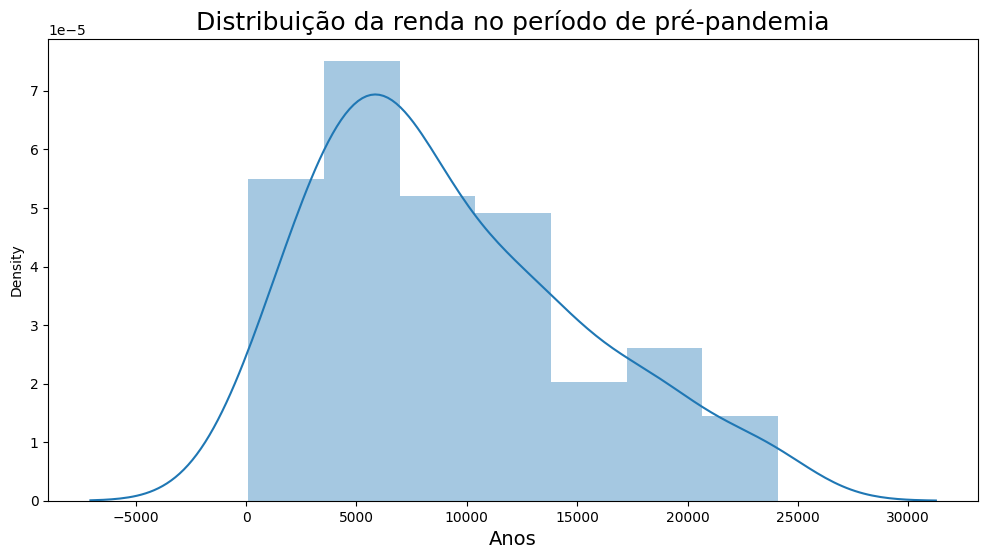

In [253]:
ax = sns.distplot(pre_pandemia.renda)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da renda no período de pré-pandemia', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

In [254]:
frequencia_absoluta_pos = pos_pandemia.renda.value_counts()
frequencia_absoluta_pos.head()

renda
25959    1
18166    1
21422    1
15387    1
5530     1
Name: count, dtype: int64

In [255]:
frequencia_relativa_pos = pos_pandemia.renda.value_counts(normalize=True)
frequencia_relativa_pos.head()

renda
25959    0.009804
18166    0.009804
21422    0.009804
15387    0.009804
5530     0.009804
Name: proportion, dtype: float64

In [256]:
distribuicao_renda_pos = pd.DataFrame(
    data={'Frequência Absoluta' : frequencia_absoluta_pos,
          'Frequência Relativa' : frequencia_relativa_pos}
)
distribuicao_renda_pos.sort_index(inplace=True)
distribuicao_renda_pos.head()

,Frequência Absoluta,Frequência Relativa
renda,,
1995,1,0.009804
3191,1,0.009804
4148,1,0.009804
5512,1,0.009804
5530,1,0.009804


/tmp/ipykernel_6220/4279020928.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(pos_pandemia.renda)


<Axes: title={'center': 'Distribuição da renda no período de pós-pandemia'}, xlabel='Anos', ylabel='Density'>

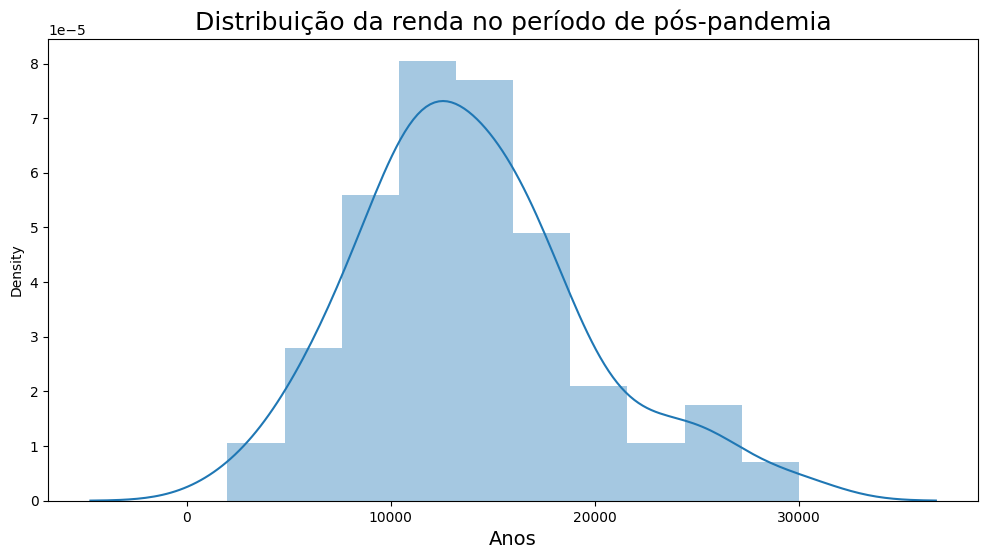

In [257]:
ax = sns.distplot(pos_pandemia.renda)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da renda no período de pós-pandemia', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

In [258]:
renda_info_pandemia = clientes_df.groupby('pre-pandemia')['renda'].agg(['min', 'max', 'mean', 'median'])
renda_info_pandemia.rename(index={0: 'Não', 1: 'Sim'})

,min,max,mean,median
pre-pandemia,,,,
Não,1995,30000,13968.500000,13380.5
Sim,110,24090,9180.643564,7488.0


<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='pre-pandemia'>

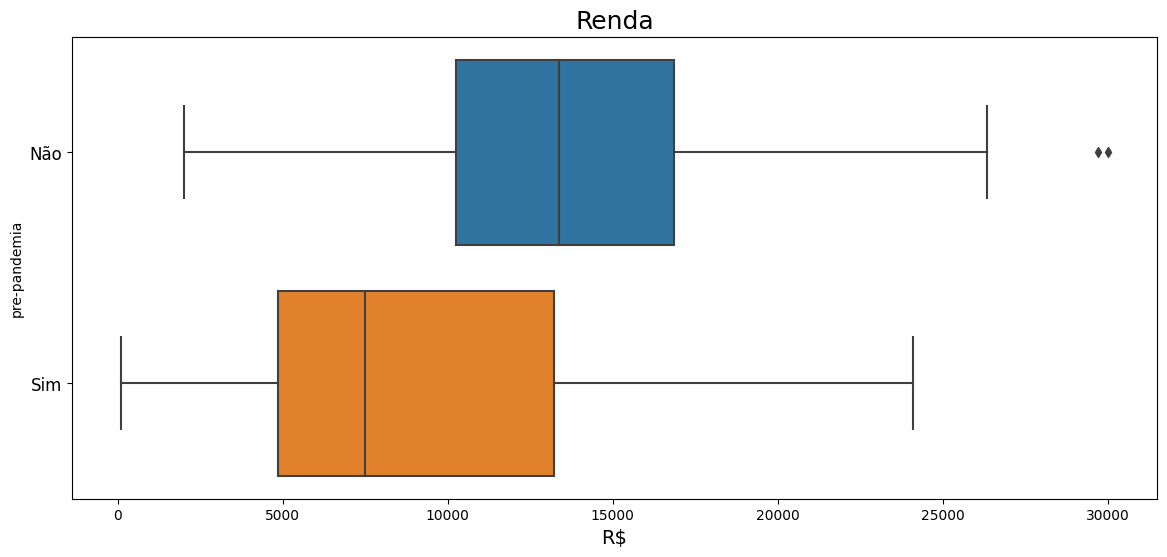

In [259]:
ax = sns.boxplot(x='renda', y='pre-pandemia', data=clientes_df, orient='h')
ax.figure.set_size_inches(14, 6)
ax.set_title("Renda", fontsize=18)
ax.set_xlabel("R$", fontsize=14)
ax.set_yticklabels(['Não', 'Sim'], fontsize=12)
ax

#### Região

In [260]:
frequencia_absoluta_pre = pre_pandemia['regiao-BR'].value_counts()
frequencia_absoluta_pre.head()

regiao-BR
Sul             29
Nordeste        26
Sudeste         21
Centro-Oeste    17
Norte            8
Name: count, dtype: int64

In [261]:
frequencia_relativa_pre = pre_pandemia['regiao-BR'].value_counts(normalize=True)
frequencia_relativa_pre.head()

regiao-BR
Sul             0.287129
Nordeste        0.257426
Sudeste         0.207921
Centro-Oeste    0.168317
Norte           0.079208
Name: proportion, dtype: float64

In [262]:
distribuicao_regiao_pre = pd.DataFrame(
    data={'Frequência Absoluta' : frequencia_absoluta_pre,
          'Frequência Relativa' : frequencia_relativa_pre}
)
distribuicao_regiao_pre.head()

,Frequência Absoluta,Frequência Relativa
regiao-BR,,
Sul,29,0.287129
Nordeste,26,0.257426
Sudeste,21,0.207921
Centro-Oeste,17,0.168317
Norte,8,0.079208


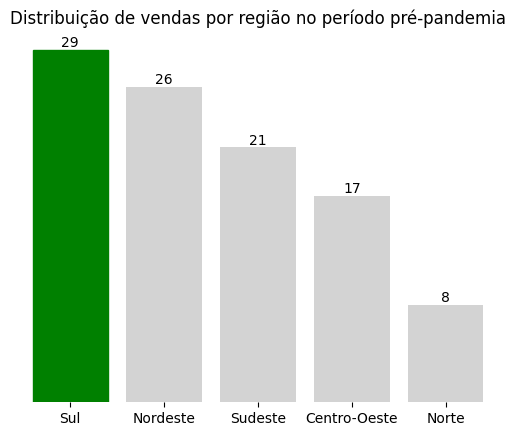

In [263]:
barras = plt.bar(distribuicao_regiao_pre.index, distribuicao_regiao_pre['Frequência Absoluta'], color='lightgray')

# destaque a região com mais clientes
barras[0].set_color('green')

# valores na barra
plt.bar_label(barras, labels=distribuicao_regiao_pre['Frequência Absoluta'])

# retirando as bordas do gráfico
plt.box(False)

# retirando o eixo y
plt.yticks([])

plt.title('Distribuição de vendas por região no período pré-pandemia')

plt.show()

In [264]:
frequencia_absoluta_pos = pos_pandemia['regiao-BR'].value_counts()
frequencia_absoluta_pos.head()

regiao-BR
Sul             42
Nordeste        25
Sudeste         18
Norte            9
Centro-Oeste     8
Name: count, dtype: int64

In [265]:
frequencia_relativa_pos = pos_pandemia['regiao-BR'].value_counts(normalize=True)
frequencia_relativa_pos.head()

regiao-BR
Sul             0.411765
Nordeste        0.245098
Sudeste         0.176471
Norte           0.088235
Centro-Oeste    0.078431
Name: proportion, dtype: float64

In [266]:
distribuicao_regiao_pos = pd.DataFrame(
    data={'Frequência Absoluta' : frequencia_absoluta_pos,
          'Frequência Relativa' : frequencia_relativa_pos}
)
distribuicao_regiao_pos.head()

,Frequência Absoluta,Frequência Relativa
regiao-BR,,
Sul,42,0.411765
Nordeste,25,0.245098
Sudeste,18,0.176471
Norte,9,0.088235
Centro-Oeste,8,0.078431


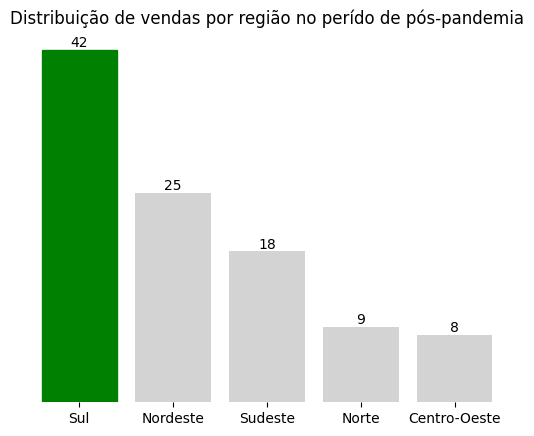

In [267]:
barras = plt.bar(distribuicao_regiao_pos.index, distribuicao_regiao_pos['Frequência Absoluta'], color='lightgray')

# destaque a região com mais clientes
barras[0].set_color('green')

# valores na barra
plt.bar_label(barras, labels=distribuicao_regiao_pos['Frequência Absoluta'])

# retirando as bordas do gráfico
plt.box(False)

# retirando o eixo y
plt.yticks([])

plt.title('Distribuição de vendas por região no perído de pós-pandemia')

plt.show()

#### Produtos

In [268]:
frequencia_absoluta_pre = pre_pandemia.produto.value_counts()
frequencia_absoluta_pre.head()

produto
batom          61
desodorante    20
antissinais     9
sombra          4
perfume         4
Name: count, dtype: int64

In [269]:
frequencia_relativa_pre = pre_pandemia.produto.value_counts(normalize=True)
frequencia_relativa_pre.head()

produto
batom          0.603960
desodorante    0.198020
antissinais    0.089109
sombra         0.039604
perfume        0.039604
Name: proportion, dtype: float64

In [270]:
distribuicao_produto_pre = pd.DataFrame(
    data={'Frequência Absoluta' : frequencia_absoluta_pre,
          'Frequência Relativa' : frequencia_relativa_pre}
)
distribuicao_produto_pre.head()

,Frequência Absoluta,Frequência Relativa
produto,,
batom,61,0.603960
desodorante,20,0.198020
antissinais,9,0.089109
sombra,4,0.039604
perfume,4,0.039604


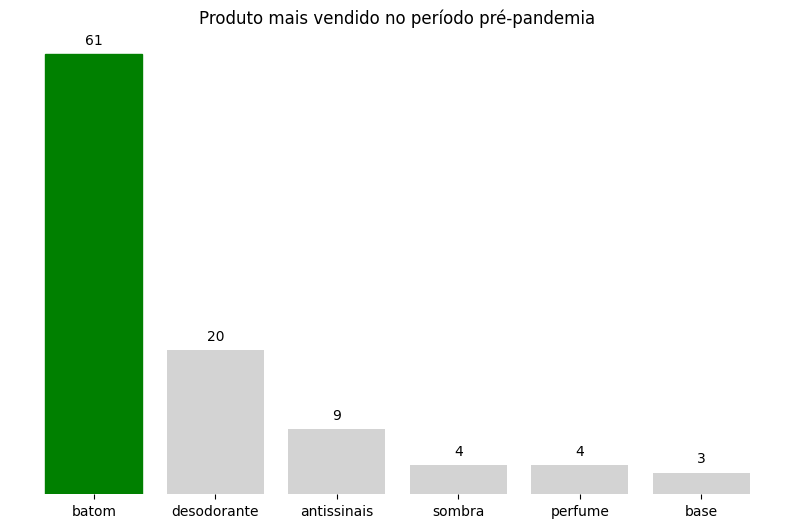

In [271]:
# Define o tamanho da figura
plt.figure(figsize=(10, 6))

barras = plt.bar(distribuicao_produto_pre.index, distribuicao_produto_pre['Frequência Absoluta'], color='lightgray')

# destaque a região com mais clientes
barras[0].set_color('green')

# valores na barra
plt.bar_label(barras, labels=distribuicao_produto_pre['Frequência Absoluta'], padding=5)

# retirando as bordas do gráfico
plt.box(False)

# retirando o eixo y
plt.yticks([])

plt.title('Produto mais vendido no período pré-pandemia')

plt.show()

In [272]:
frequencia_absoluta_pos = pos_pandemia.produto.value_counts()
frequencia_absoluta_pos.head()

produto
desodorante    46
antissinais    20
batom          15
sombra          9
perfume         8
Name: count, dtype: int64

In [273]:
frequencia_relativa_pos = pos_pandemia.produto.value_counts(normalize=True)
frequencia_relativa_pos.head()

produto
desodorante    0.450980
antissinais    0.196078
batom          0.147059
sombra         0.088235
perfume        0.078431
Name: proportion, dtype: float64

In [274]:
distribuicao_produto_pos = pd.DataFrame(
    data={'Frequência Absoluta' : frequencia_absoluta_pos,
          'Frequência Relativa' : frequencia_relativa_pos}
)
distribuicao_produto_pos.head()

,Frequência Absoluta,Frequência Relativa
produto,,
desodorante,46,0.450980
antissinais,20,0.196078
batom,15,0.147059
sombra,9,0.088235
perfume,8,0.078431


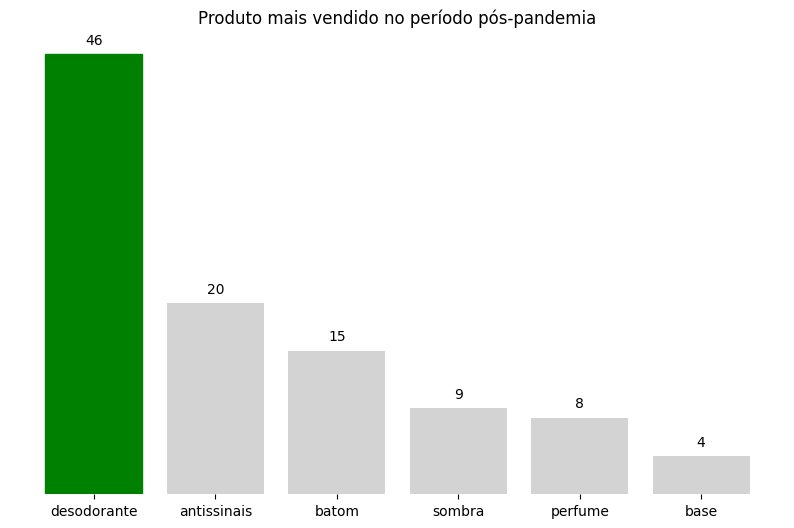

In [275]:
# Define o tamanho da figura
plt.figure(figsize=(10, 6))

barras = plt.bar(distribuicao_produto_pos.index, distribuicao_produto_pos['Frequência Absoluta'], color='lightgray')

# destaque a região com mais clientes
barras[0].set_color('green')

# valores na barra
plt.bar_label(barras, labels=distribuicao_produto_pos['Frequência Absoluta'], padding=5)

# retirando as bordas do gráfico
plt.box(False)

# retirando o eixo y
plt.yticks([])

plt.title('Produto mais vendido no período pós-pandemia')

plt.show()

### Item 2

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Região'>

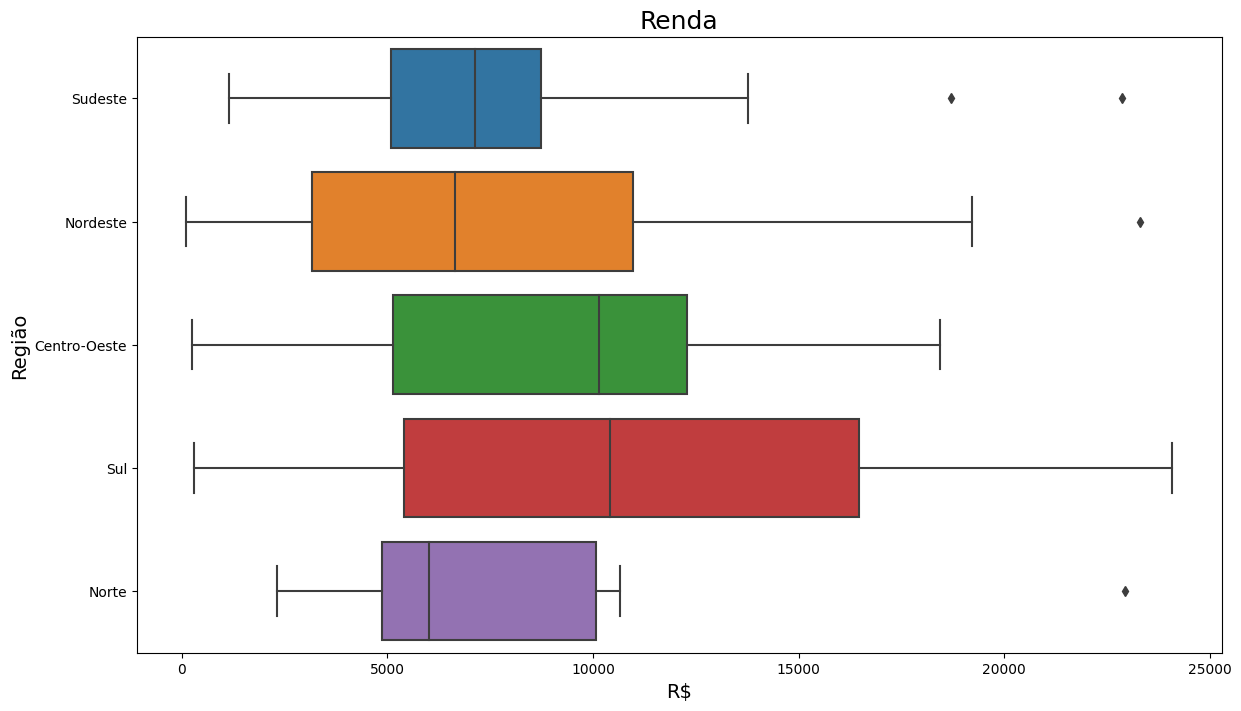

In [276]:
ax = sns.boxplot(x='renda', y='regiao-BR', data=pre_pandemia, orient='h')
ax.figure.set_size_inches(14, 8)
ax.set_title("Renda", fontsize=18)
ax.set_xlabel("R$", fontsize=14)
ax.set_ylabel("Região", fontsize=14)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Região'>

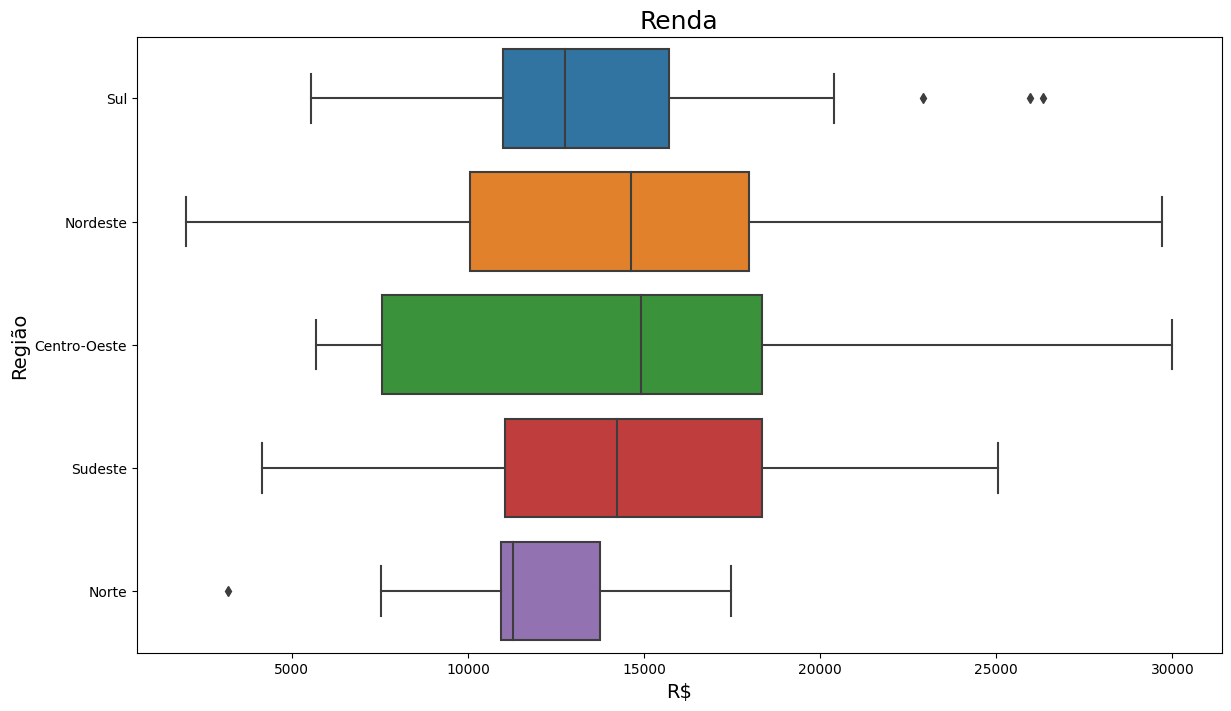

In [277]:
ax = sns.boxplot(x='renda', y='regiao-BR', data=pos_pandemia, orient='h')
ax.figure.set_size_inches(14, 8)
ax.set_title("Renda", fontsize=18)
ax.set_xlabel("R$", fontsize=14)
ax.set_ylabel("Região", fontsize=14)
ax

#### Conclusão

**Características do cliente no período de pré-pandemia**
* Público alvo mais jovem, a média da idade dos clientes é de, aproximadamente, 39 anos
* A renda média é de R$ 9.180,00
* A região com mais vendas é a região Sul
* Batom é o produto mais vendido

**Características do cliente no período de pós-pandemia**
* Público alvo mais velho, a média da idade dos clientes é de, aproximadamente, 46 anos
* A renda média é de R$ 13.968,00
* A região com mais vendas é a Sul
* Desodorante é o produto mais vendido

#### Diferenças nítidas pré e pós pandemia
* A média de idade dos clientes teve um aumento de 7 anos (Lojas fechadas... Pessoas mais velhas passaram a comprar itens online?)
* A renda dos clientes aumentou (Negócio próprio? Novo emprego? Inflação?)
* A região Sul continua sendo a região com mais vendas
* O produto mais vendido deixou de ser o batom para passar a ser o desodorante

#### Estatística
* A média de idade aumentou, aproximadamente, 18%
* A renda média dos clientes cresceu 52%
* A região Sul teve um aumento de vendas de 45%

### Item 3

In [278]:
# Dados fornecidos no problema
N = 100000
confianca = 0.95
erro_percentual = 0.02

In [279]:
# Calculando z a partir do valor de confiança fornecido
z = norm.ppf(confianca/2 + 0.5)
z

1.959963984540054

In [280]:
s = clientes_df.renda.std()
s

6288.0167075146455

In [281]:
media_amostral = clientes_df.renda.mean()
media_amostral

11586.364532019705

In [282]:
e = media_amostral * erro_percentual
e

231.7272906403941

#### Obtendo $n$

#### $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [283]:
n = ((z**2) * (s**2) * N) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
n = int(n.round())
n

2751

In [284]:
resposta = "A base informada não é suficiente" if clientes_df.shape[0] < n else "A base informada é suficiente"
print(f"{resposta}, tamanho da base é de {clientes_df.shape[0]}\ne o requerido para 95% confiança com 2% de margem de erro é {n}")

A base informada não é suficiente, tamanho da base é de 203
e o requerido para 95% confiança com 2% de margem de erro é 2751


In [285]:
erro_percentual = 0.1
e = media_amostral * erro_percentual
e

1158.6364532019704

In [286]:
n = ((z**2) * (s**2) * N) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
n = int(n.round())
n

113

In [287]:
resposta = "A base informada não é suficiente" if clientes_df.shape[0] < n else "A base informada é suficiente"
print(f"{resposta}, tamanho da base é de {clientes_df.shape[0]}\ne o requerido para 95% confiança com 10% de margem de erro é {n}")

A base informada é suficiente, tamanho da base é de 203
e o requerido para 95% confiança com 10% de margem de erro é 113


# Desafio 2